In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
data = pd.read_excel("Telco_customer_churn.xlsx")
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [9]:
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [10]:
def data_info(data):
    cols=[]
    unique_val=[]
    n_uniques=[]
    dtypes=[]
    nulls=[]
    for col in data.columns:
        cols.append(col)
        dtypes.append(data[col].dtype)
        n_uniques.append(data[col].nunique())
        unique_val.append(data[col].unique())
        nulls.append(data[col].isna().sum())

    return pd.DataFrame({"Col":cols,"dtype":dtypes,"n_uniques":n_uniques,"Unique Values":unique_val,"Nulls":nulls})

In [11]:
data.drop(['CustomerID','Churn Label','Count','Country','State','Zip Code','Lat Long','City'],axis=1,inplace=True)

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Contract']=le.fit_transform(data['Contract'])

In [13]:
data['Churn Value'].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

In [14]:
data['Churn Reason'].fillna("not leave",inplace=True)

C:\Users\Mgama\AppData\Local\Temp\ipykernel_26420\3116493132.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Churn Reason'].fillna("not leave",inplace=True)


In [15]:
data['Total Charges']=pd.to_numeric(data['Total Charges'],errors='coerce')

In [16]:
data['Total Charges'].fillna(data['Total Charges'].mean(),inplace=True)

C:\Users\Mgama\AppData\Local\Temp\ipykernel_26420\2330687429.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Total Charges'].fillna(data['Total Charges'].mean(),inplace=True)


In [17]:
data=pd.get_dummies(data,drop_first=True)
data.head()

,Latitude,Longitude,Tenure Months,Contract,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Gender_Male,...,Churn Reason_Limited range of services,Churn Reason_Long distance charges,Churn Reason_Moved,Churn Reason_Network reliability,Churn Reason_Poor expertise of online support,Churn Reason_Poor expertise of phone support,Churn Reason_Price too high,Churn Reason_Product dissatisfaction,Churn Reason_Service dissatisfaction,Churn Reason_not leave
0,33.964131,-118.272783,2,0,53.85,108.15,1,86,3239,True,...,False,False,False,False,False,False,False,False,False,False
1,34.059281,-118.307420,2,0,70.70,151.65,1,67,2701,False,...,False,False,True,False,False,False,False,False,False,False
2,34.048013,-118.293953,8,0,99.65,820.50,1,86,5372,False,...,False,False,True,False,False,False,False,False,False,False
3,34.062125,-118.315709,28,0,104.80,3046.05,1,84,5003,False,...,False,False,True,False,False,False,False,False,False,False
4,34.039224,-118.266293,49,0,103.70,5036.30,1,89,5340,True,...,False,False,False,False,False,False,False,False,False,False


In [18]:
X=data.drop(['Churn Value'],axis=1).values
y=data['Churn Value'].values

In [19]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

In [20]:
#fearture scaling
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()



train_X=sd.fit_transform(train_X)
test_X=sd.transform(test_X)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [23]:
model = Sequential()
model.add(Dense(50,activation='relu',input_shape=(train_X.shape[1],)))
model.add(Dense(30,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

C:\Users\Mgama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │         2,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,261 (16.64 KB)

 Trainable params: 4,261 (16.64 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
from tensorflow.keras.optimizers import SGD , Adam ,Adagrad

In [36]:

opt = Adam(learning_rate=0.001, beta_1 = 0.9 , beta_2 = 0.99)
model.compile( loss='binary_crossentropy',optimizer=opt, metrics=['accuracy'])
history=model.fit(train_X,train_y,epochs=20,batch_size=64,validation_data=(test_X,test_y))

Epoch 1/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.2708e-07 - val_accuracy: 1.0000 - val_loss: 2.9674e-07
Epoch 2/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.7320e-08 - val_accuracy: 1.0000 - val_loss: 2.2795e-07
Epoch 3/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.1882e-08 - val_accuracy: 1.0000 - val_loss: 1.6587e-07
Epoch 4/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.8452e-09 - val_accuracy: 1.0000 - val_loss: 1.1986e-07
Epoch 5/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.4571e-09 - val_accuracy: 1.0000 - val_loss: 9.0621e-08
Epoch 6/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.0878e-09 - val_accuracy: 1.0000 - val_loss: 7.1085e-08
Epoch 7/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.1185e-09 - val_accuracy: 1.0000 - val_loss: 5.7017e-08
Epoch 8/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 

In [37]:
def create_model ():
    model = Sequential([ Dense (64,activation ='relu' , input_shape = (train_X.shape[1],)),
    Dense (32 , activation ='relu' ),
    Dense (1 , activation ='sigmoid' )])
    
    return model

In [38]:
optimizer_grid ={
    'Adam':[
        {'learning_rate':0.5, 'beta_1':  0.9, 'beta_2':0.99},
        {'learning_rate':0.0001, 'beta_1':  0.9, 'beta_2':0.9},
        {'learning_rate':0.001, 'beta_1':  0.9, 'beta_2':0.1}
    ],
    'SGD':[
        {'learning_rate':0.5, 'momentum':  0.0},
        {'learning_rate':0.0001, 'momentum':  0.9},
        {'learning_rate':0.001, 'momentum':  0.5}
    ],
    'Adagrad': [
        {'learning_rate':0.01},
        {'learning_rate':0.005}
]
}

In [39]:
result = []

In [41]:
for opt_name , config in optimizer_grid.items():
    for cfg in config:
        print(f"train with {opt_name} and {cfg}")
        model = create_model()

        if opt_name == 'Adam':
            opt = Adam(**cfg)
        elif opt_name == 'SGD':
            opt = SGD(**cfg)
        elif opt_name == 'Adagrad':
            opt = Adagrad(**cfg)


        model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
        history = model.fit(train_X, train_y, epochs=30, batch_size=32, validation_data=(test_X, test_y), verbose=0)
        y_pred = (model.predict(test_X) > 0.5).astype(int).flatten()
        acc = np.mean(y_pred == test_y)
        result.append({'optimizer':opt_name, 'config':cfg, 'test_accuracy':acc})

train with Adam and {'learning_rate': 0.5, 'beta_1': 0.9, 'beta_2': 0.99}
Epoch 1/30


C:\Users\Mgama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8170 - loss: 2.3479 - val_accuracy: 0.7786 - val_loss: 2.9156
Epoch 2/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7362 - loss: 1.4195 - val_accuracy: 0.7324 - val_loss: 0.5292
Epoch 3/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7341 - loss: 0.5546 - val_accuracy: 0.7324 - val_loss: 0.5356
Epoch 4/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7352 - loss: 1.3984 - val_accuracy: 0.7324 - val_loss: 0.5510
Epoch 5/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7346 - loss: 1.4083 - val_accuracy: 0.7324 - val_loss: 0.5814
Epoch 6/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7352 - loss: 0.7757 - val_accuracy: 0.7324 - val_loss: 0.6075
Epoch 7/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7352 - loss: 0.5856 - val_accuracy: 0.7324 - val_loss: 0.5827
Epoch 8/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7352 - loss: 0.5871 - val_accuracy: 0.7324 - val_

In [44]:
results_df = pd.DataFrame(result)
results_df = results_df.sort_values(by='test_accuracy', ascending=False)
print(results_df)

  optimizer                                             config  test_accuracy
1      Adam  {'learning_rate': 0.0001, 'beta_1': 0.9, 'beta...       1.000000
3       SGD            {'learning_rate': 0.5, 'momentum': 0.0}       1.000000
6   Adagrad                            {'learning_rate': 0.01}       1.000000
7   Adagrad                           {'learning_rate': 0.005}       0.999290
5       SGD          {'learning_rate': 0.001, 'momentum': 0.5}       0.996451
4       SGD         {'learning_rate': 0.0001, 'momentum': 0.9}       0.990774
2      Adam  {'learning_rate': 0.001, 'beta_1': 0.9, 'beta_...       0.732434
0      Adam  {'learning_rate': 0.5, 'beta_1': 0.9, 'beta_2'...       0.732434


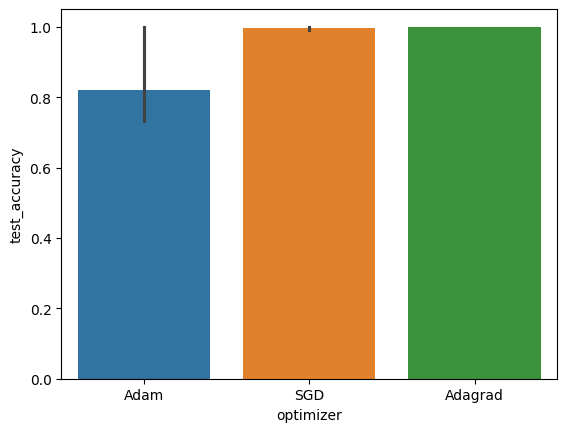

In [46]:
import seaborn as sns
plt.Figure(figsize=(12,6))
sns .barplot(x='optimizer', y='test_accuracy', hue = 'optimizer' , data = results_df)
plt.show()